<html>
    <div style="color:#363945; background-color:#E1F6FF; display: block">
        <h1> Data Cleaning - Notebook Summary </h1>
            <ol>
                <li>Loading data and applying a <strong>Quick Sanity Check</strong> to ensure data quality.</li>
                <li>The goal of this analysis is to only include technical roles; So I'm going to <strong>exclude some Non-Technical Roles</strong> in the survey.</li>
                <li><strong>Filtering</strong> the data using masks based on frequencies of roles and skills per different responses.</li>
                <li>The final step is to <strong>Merge</strong> and <strong>Export</strong> the results.</li>
            </ol>
    </div>
</html>

In [1]:
# CONSTANTS
DF_PATH = "../data/processed/01_preprocessed.pkl"
ENCODED_DF_PATH = "../data/processed/02_preprocessed_1_Hot_Encoded.pkl"
FEATURES_PATH = "../data/processed/features_skills_clusters_counts.pkl"
EXPORT_PATH = "../data/processed/03_cleaned_data.pkl"

# Technologies worked` with
TECH_COLS = ['DatabaseWorkedWith', 'LanguageWorkedWith', 
             'MiscTechWorkedWith', 'WebframeWorkedWith']

# Job Titles
ROLE_COLS = ['DevType']

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [3]:
# Reading data frames
processed_df = pd.read_pickle(DF_PATH)
encoded_df = pd.read_pickle(ENCODED_DF_PATH)
features_df = pd.read_pickle(FEATURES_PATH)

## 1. Quick Sanity Check

In [4]:
# Select random int
i = np.random.randint(processed_df.shape[0])

# Print original values
print(processed_df.iloc[i][ROLE_COLS].tolist())
print(processed_df.iloc[i][TECH_COLS].tolist())
print("----------------")

# Print processed
print(encoded_df.iloc[i][encoded_df.iloc[i] == 1])
print("----------------")

# Check clustering 
print("Clusters:",features_df.iloc[i].sum())
print("Skills:",  encoded_df[TECH_COLS].iloc[i].sum())

[['Developer, front-end']]
[[], ['HTML/CSS', 'JavaScript', 'PHP', 'TypeScript'], [], []]
----------------
LanguageWorkedWith  HTML/CSS                1
                    JavaScript              1
                    PHP                     1
                    TypeScript              1
DevType             Developer, front-end    1
Name: 37026, dtype: int32
----------------
Clusters: 4
Skills: 4


## 2. Excluding Non-Technical Roles

In [5]:
EXCLUDED_ROLES = ['Designer', 'Educator', 'Engineering manager',
                  'Engineer, site reliability', 'Product manager', 
                  'Senior executive/VP','Marketing or sales professional']

for role in EXCLUDED_ROLES:
    encoded_df = encoded_df.drop(("DevType", role), axis=1)

## 3. Filtering Data

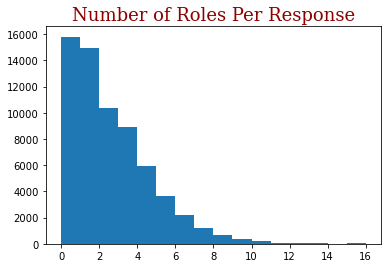

In [6]:
%matplotlib inline
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }

# Visualizing the Number of roles per respondent 
freq_roles = encoded_df[ROLE_COLS].sum(axis=1)
plt.hist(freq_roles, freq_roles.max())
plt.title("Number of Roles Per Response",
          fontdict=font)
plt.show()

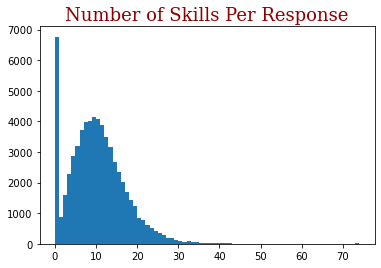

In [7]:
# Visualizing the Number of skills per respondent
freq_tech = encoded_df[TECH_COLS].sum(axis=1)
plt.hist(freq_tech, freq_tech.max())
plt.title("Number of Skills Per Response", fontdict=font)
plt.show()

### Comments
- We noticed that there exist some noise in data like the ones having __16 Job profiles__ or the ones having over __70 skills__, these results seem to be not meaningful at all.
- We are going to include a certain range for both skills and roles in order to have a representant model.

In [8]:
# Filter Frequencies
ROLES_RANGE = [1,2]
TECH_RANGE = [3,12]

In [9]:
# Creating Masks
roles_mask = (freq_roles >= ROLES_RANGE[0]) & (freq_roles <= ROLES_RANGE[1])
tech_mask = (freq_tech >= TECH_RANGE[0]) & (freq_tech <= TECH_RANGE[1])
filter_mask = roles_mask & tech_mask

In [10]:
features_df = features_df.loc[filter_mask].copy()
encoded_df = encoded_df.loc[filter_mask].copy()

## Merging and Exporting Results

In [11]:
# Add second level indexing 
features_df.columns = pd.MultiIndex.from_product([['skills_clusters'],
                                                  features_df.columns])                                                  

In [12]:
# Concatenate
df = pd.concat([encoded_df, features_df], axis=1)
# Export 
df.to_pickle(EXPORT_PATH)